# Sentiment Analysis Project: Understanding Public Opinion
# This project delves into the world of sentiment analysis, a technique used to understand the emotional tone behind a piece of text. Here, we'll build a system to classify text data as positive, negative, or neutral based on its sentiment.

* Checking for missing values (isnull)
* Checking the shape of the DataFrame (shape)
* Identifying and handling duplicate rows (duplicated.sum(), drop_duplicates())
* Converting text to lowercase (str.lower()) Exploratory Data Analysis (EDA) | This section performs exploratory data analysis to understand the
    distribution of sentiment classes:
* Counting the occurrences of each sentiment value (value_counts())
* Visualizing the distribution using bar plots (sns.barplot) with and without converting counts to percentages Data Balancing | This section 
    addresses class imbalance by oversampling the minority classes using RandomOverSampler from the imbalanced-learn library.Data Preprocessing |
    This section prepares the data for machine learning by:
* Encoding the sentiment labels using LabelEncoder
* Removing punctuation using a custom function (remove_punc1)
* Removing stopwords using a function utilizing NLTK's stopwords module (remove_stopwords)
* Tokenizing the text using spaCy (tokenize_text)
* Lemmatizing the tokens (lemmatize_text) Feature Engineering | This section creates a Word Cloud to visualize frequently occurring words and 
    trains two Word2Vec models (cbow_model and skipgram_model) to represent text data as numerical vectors. It also adds these vectors as features
    to the DataFrame.Model Building | This section defines a dictionary (classifiers) containing various machine learning classifiers. It then 
    iterates through these classifiers:
* Splits the data into features (X) and target variable (y)
* Splits the data into training and testing sets (train_test_split)
* Encodes the target variable using LabelEncoder
* Trains the classifier on the training data (fit)
* Predicts labels on the testing data (predict)
* Calculates various evaluation metrics including confusion matrix (confusion_matrix), precision, recall, F1-score, support, classification report 
    (classification_report), and accuracy (accuracy_score)

In [2]:
# Standard libraries
import warnings

# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

# NLP libraries
import spacy
from wordcloud import WordCloud
from gensim.models import Word2Vec

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the CSV file with specified encoding and column names
df = pd.read_csv('/kaggle/input/sentiment-data/data.csv', encoding='unicode_escape', names=['Sentiment', 'Text'])

In [4]:
# Count the number of null values in each column
isnull = df.isnull().sum()

# Get the shape of the DataFrame
shape = df.shape

# Print the number of null values for each column
print("     NULL   ")
print(isnull)

# Print the shape of the DataFrame
print("Shape:", shape)


     NULL   
Sentiment    0
Text         0
dtype: int64
Shape: (4846, 2)


In [5]:
# Count the number of duplicated rows in the DataFrame
df.duplicated().sum()

# Drop duplicate rows from the DataFrame
df.drop_duplicates()


,Sentiment,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [6]:
# Convert the 'Text' column to lowercase
df['Text'] = df['Text'].str.lower()

In [7]:
# Count the occurrences of each sentiment value in the 'Sentiment' column
df['Sentiment'].value_counts()

Sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64

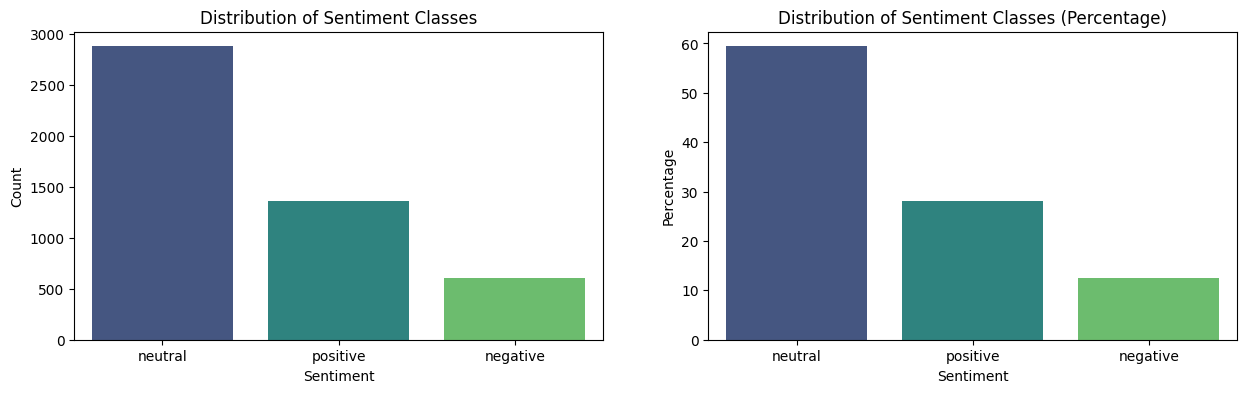

In [8]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data
sentiment_counts = df['Sentiment'].value_counts()

# Plotting side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Plotting count distribution
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis", ax=axes[0])
axes[0].set_title('Distribution of Sentiment Classes')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

# Converting counts to percentage
sentiment_percentage = df['Sentiment'].value_counts(normalize=True) * 100  

# Plotting percentage distribution
sns.barplot(x=sentiment_percentage.index, y=sentiment_percentage.values, palette="viridis", ax=axes[1])
axes[1].set_title('Distribution of Sentiment Classes (Percentage)')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Percentage')

plt.show()


In [9]:
# Importing RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

# Initializing RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resampling the dataset
X_resampled, y_resampled = oversampler.fit_resample(df.drop('Sentiment', axis=1), df['Sentiment'])

# Creating a new balanced DataFrame
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

# Assigning the balanced DataFrame back to the original variable
df = balanced_df

# Counting the occurrences of each sentiment value in the 'Sentiment' column
df['Sentiment'].value_counts()



Sentiment
neutral     2879
negative    2879
positive    2879
Name: count, dtype: int64

In [10]:
# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Creating a label encoder object
label_encoder = LabelEncoder()

# Applying label encoding to the sentiment column
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

# Displaying the updated DataFrame
print(df.head())

                                                Text  Sentiment
0  according to gran , the company has no plans t...          1
1  technopolis plans to develop in stages an area...          1
2  the international electronic industry company ...          0
3  with the new production plant the company woul...          2
4  according to the company 's updated strategy f...          2


In [11]:
# Importing string module for punctuation
import string

# Define punctuation to be excluded
exclude = string.punctuation

# Define function to remove punctuation
def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))

# Applying the remove_punc1 function to the 'Text' column
df['Text'] = df['Text'].apply(remove_punc1)


In [12]:
# Importing NLTK's stopwords module
from nltk.corpus import stopwords

# Defining a function to remove stopwords
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word not in stopwords.words('english'):
            new_text.append(word)
    
    return ' '.join(new_text)

# Applying the remove_stopwords function to the 'Text' column
df['Text'] = df['Text'].apply(remove_stopwords)


In [13]:
import spacy
import pandas as pd

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Function to tokenize text using spaCy
def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Function to lemmatize text
def lemmatize_text(tokens):
    doc = nlp(' '.join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens

# Apply word tokenization using spaCy to the 'review' column
df['Text'] = df['Text'].apply(tokenize_text)

# Apply lemmatization to the 'Text' column
df['Text'] = df['Text'].apply(lemmatize_text)

# Print the DataFrame to verify the lemmatization
print(df['Text'])


0       [accord, gran, company, plan, move, production...
1       [technopoli, plan, develop, stage, area, less,...
2       [international, electronic, industry, company,...
3       [new, production, plant, company, would, incre...
4       [accord, company, update, strategy, year, 2009...
                              ...                        
8632    [top, consensus, forecast, earning, 021, euro,...
8633    [tower, choose, add, due, go, operation, summe...
8634    [banking, sampo, unchanged, 1424, eur, nordea,...
8635    [apartment, block, welllocate, easy, reach, ci...
8636    [net, sale, total, eur, 936, mn, eur, 932, mn,...
Name: Text, Length: 8637, dtype: object


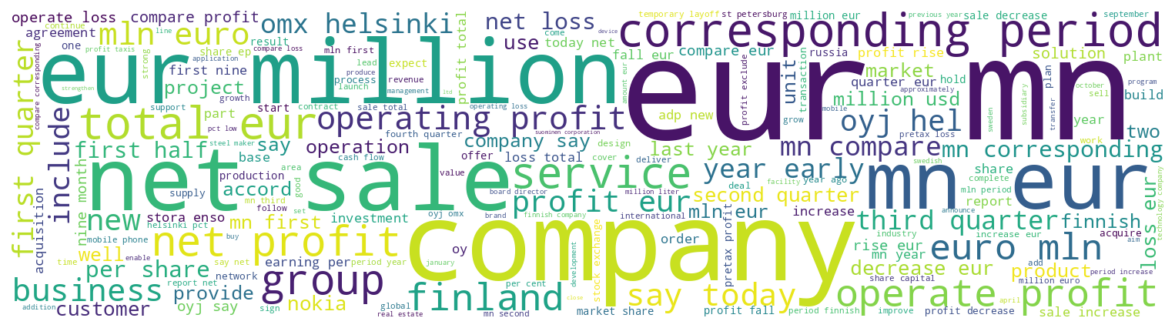

In [14]:
# Importing required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df with a column named 'Text' containing the text data
# Load your DataFrame

# Concatenate all the text into a single string
text = ' '.join(' '.join(tokens) for tokens in df['Text'])

# Generate the word cloud
wordcloud = WordCloud(width=1500, height=400, background_color='white', stopwords=None).generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [15]:
# Importing Word2Vec from gensim
from gensim.models import Word2Vec

# Train Word2Vec model with CBOW
cbow_model = Word2Vec(sentences=df['Text'], vector_size=100, window=5, min_count=1, workers=4, sg=0)

# Train Word2Vec model with Skip-gram
skipgram_model = Word2Vec(sentences=df['Text'], vector_size=100, window=5, min_count=1, workers=4, sg=1)

# Function to get the vector representation of a review
def Text_vector(review, model):
    vectors = [model.wv[word] for word in review if word in model.wv]
    if vectors:
        return sum(vectors) / len(vectors)
    else:
        return [0] * model.vector_size

# Add CBOW vectors to DataFrame
df['cbow_Text'] = [Text_vector(Text, cbow_model) for Text in df['Text']]

# Add Skip-gram vectors to DataFrame
df['skipgram_Text'] = [Text_vector(Text, skipgram_model) for Text in df['Text']]


In [16]:
# Importing LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Creating a label encoder object
label_encoder = LabelEncoder()

# Applying label encoding to the 'Sentiment' column
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])


# MODEL 


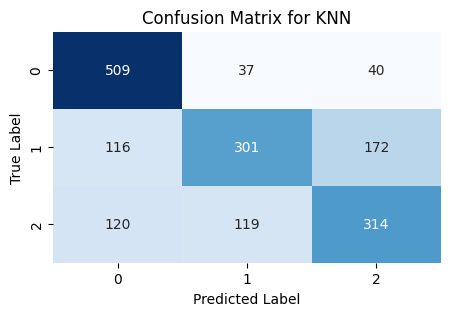

Classifier: KNN
Precision: 0.6472376012699839
Recall: 0.6504629629629629
F1-score: 0.6418040050555482
Support: None
              precision    recall  f1-score   support

           0       0.68      0.87      0.76       586
           1       0.66      0.51      0.58       589
           2       0.60      0.57      0.58       553

    accuracy                           0.65      1728
   macro avg       0.65      0.65      0.64      1728
weighted avg       0.65      0.65      0.64      1728

Accuracy: 0.6504629629629629



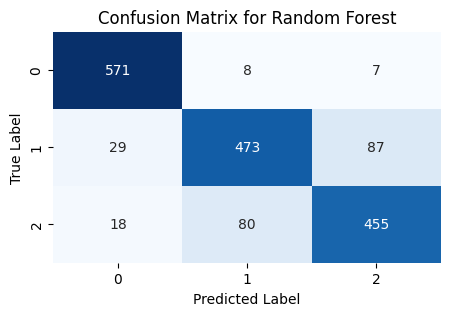

Classifier: Random Forest
Precision: 0.8659471171830262
Recall: 0.8674768518518519
F1-score: 0.8663148059343976
Support: None
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       586
           1       0.84      0.80      0.82       589
           2       0.83      0.82      0.83       553

    accuracy                           0.87      1728
   macro avg       0.87      0.87      0.87      1728
weighted avg       0.87      0.87      0.87      1728

Accuracy: 0.8674768518518519



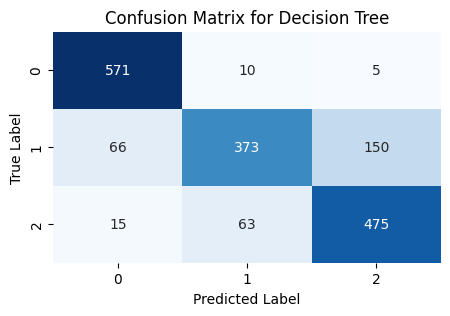

Classifier: Decision Tree
Precision: 0.8233437507818863
Recall: 0.8211805555555556
F1-score: 0.815495990747386
Support: None
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       586
           1       0.84      0.63      0.72       589
           2       0.75      0.86      0.80       553

    accuracy                           0.82      1728
   macro avg       0.82      0.82      0.82      1728
weighted avg       0.82      0.82      0.82      1728

Accuracy: 0.8211805555555556



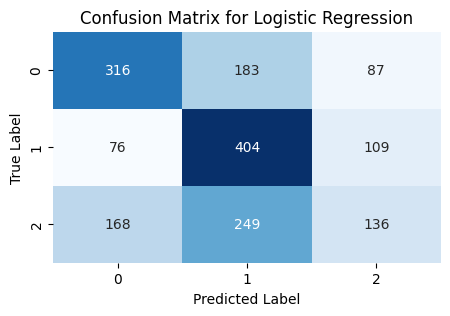

Classifier: Logistic Regression
Precision: 0.48717471799173606
Recall: 0.49537037037037035
F1-score: 0.4786482637279809
Support: None
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       586
           1       0.48      0.69      0.57       589
           2       0.41      0.25      0.31       553

    accuracy                           0.50      1728
   macro avg       0.49      0.49      0.48      1728
weighted avg       0.49      0.50      0.48      1728

Accuracy: 0.49537037037037035



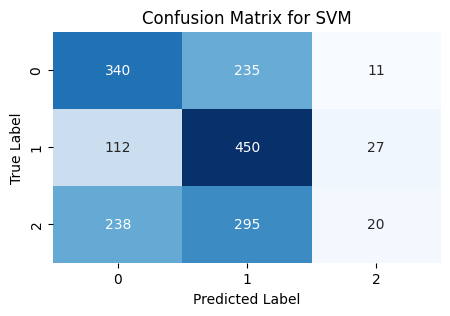

Classifier: SVM
Precision: 0.4339713321957691
Recall: 0.46875
F1-score: 0.3971932036159172
Support: None
              precision    recall  f1-score   support

           0       0.49      0.58      0.53       586
           1       0.46      0.76      0.57       589
           2       0.34      0.04      0.07       553

    accuracy                           0.47      1728
   macro avg       0.43      0.46      0.39      1728
weighted avg       0.43      0.47      0.40      1728

Accuracy: 0.46875



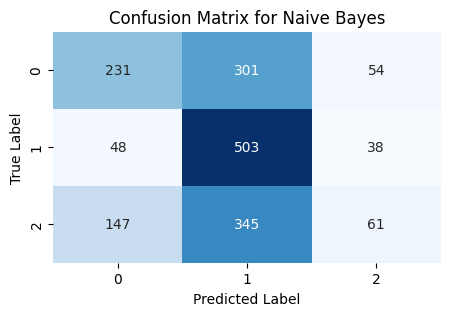

Classifier: Naive Bayes
Precision: 0.4606975585705656
Recall: 0.4600694444444444
F1-score: 0.40741394633731
Support: None
              precision    recall  f1-score   support

           0       0.54      0.39      0.46       586
           1       0.44      0.85      0.58       589
           2       0.40      0.11      0.17       553

    accuracy                           0.46      1728
   macro avg       0.46      0.45      0.40      1728
weighted avg       0.46      0.46      0.41      1728

Accuracy: 0.4600694444444444



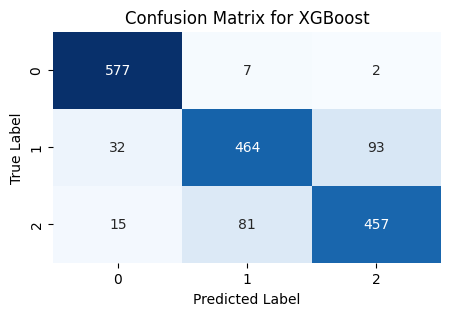

Classifier: XGBoost
Precision: 0.8650413931211034
Recall: 0.8668981481481481
F1-score: 0.8653584282324316
Support: None
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       586
           1       0.84      0.79      0.81       589
           2       0.83      0.83      0.83       553

    accuracy                           0.87      1728
   macro avg       0.86      0.87      0.86      1728
weighted avg       0.87      0.87      0.87      1728

Accuracy: 0.8668981481481481



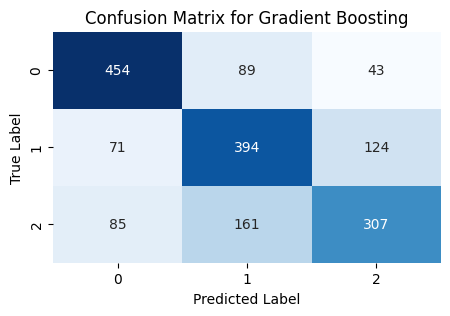

Classifier: Gradient Boosting
Precision: 0.6682033004986794
Recall: 0.6684027777777778
F1-score: 0.6666261553510751
Support: None
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       586
           1       0.61      0.67      0.64       589
           2       0.65      0.56      0.60       553

    accuracy                           0.67      1728
   macro avg       0.67      0.67      0.67      1728
weighted avg       0.67      0.67      0.67      1728

Accuracy: 0.6684027777777778



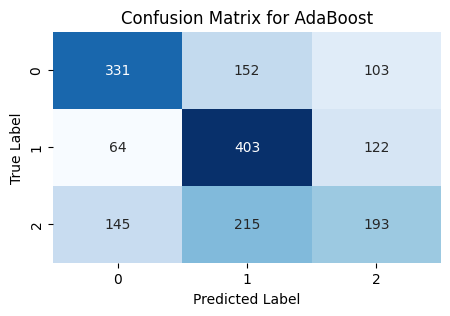

Classifier: AdaBoost
Precision: 0.5340264255499392
Recall: 0.5364583333333334
F1-score: 0.5287507749752679
Support: None
              precision    recall  f1-score   support

           0       0.61      0.56      0.59       586
           1       0.52      0.68      0.59       589
           2       0.46      0.35      0.40       553

    accuracy                           0.54      1728
   macro avg       0.53      0.53      0.53      1728
weighted avg       0.53      0.54      0.53      1728

Accuracy: 0.5364583333333334

Learning rate set to 0.087324
0:	learn: 1.0834602	total: 102ms	remaining: 1m 42s
1:	learn: 1.0695844	total: 138ms	remaining: 1m 8s
2:	learn: 1.0566023	total: 174ms	remaining: 57.8s
3:	learn: 1.0466703	total: 210ms	remaining: 52.3s
4:	learn: 1.0369554	total: 248ms	remaining: 49.4s
5:	learn: 1.0288016	total: 286ms	remaining: 47.4s
6:	learn: 1.0204274	total: 326ms	remaining: 46.2s
7:	learn: 1.0144451	total: 362ms	remaining: 44.9s
8:	learn: 1.0083994	total: 397ms	rema

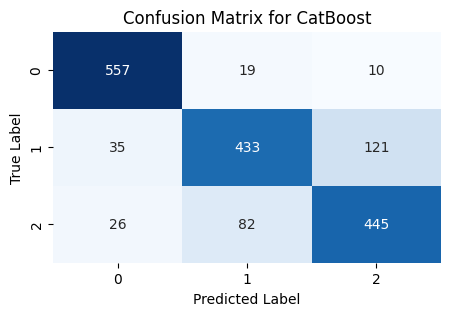

Classifier: CatBoost
Precision: 0.8292748015663839
Recall: 0.8304398148148148
F1-score: 0.8288987604465382
Support: None
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       586
           1       0.81      0.74      0.77       589
           2       0.77      0.80      0.79       553

    accuracy                           0.83      1728
   macro avg       0.83      0.83      0.83      1728
weighted avg       0.83      0.83      0.83      1728

Accuracy: 0.8304398148148148



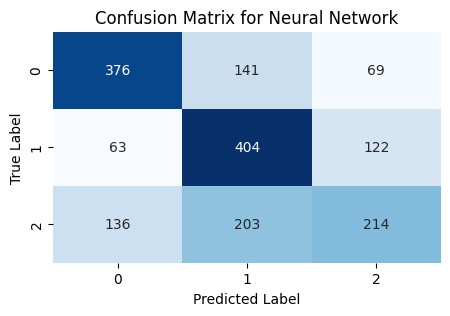

Classifier: Neural Network
Precision: 0.574952839853281
Recall: 0.5752314814814815
F1-score: 0.5686215928097297
Support: None
              precision    recall  f1-score   support

           0       0.65      0.64      0.65       586
           1       0.54      0.69      0.60       589
           2       0.53      0.39      0.45       553

    accuracy                           0.58      1728
   macro avg       0.57      0.57      0.57      1728
weighted avg       0.57      0.58      0.57      1728

Accuracy: 0.5752314814814815

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 6909, number of used features: 100
[LightGBM] [Info] Start training from score -1.102964
[LightGBM] [Info] Start training from score -1.104273
[LightGBM] [Info] Start training from score -1.088675


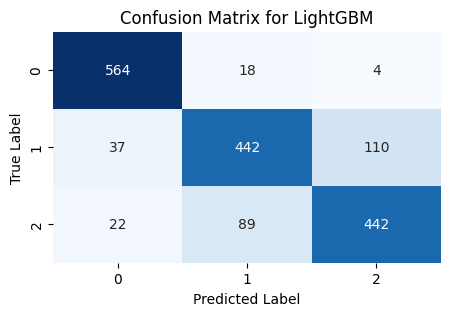

Classifier: LightGBM
Precision: 0.8358351435420921
Recall: 0.8379629629629629
F1-score: 0.8362730384475842
Support: None
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       586
           1       0.81      0.75      0.78       589
           2       0.79      0.80      0.80       553

    accuracy                           0.84      1728
   macro avg       0.84      0.84      0.84      1728
weighted avg       0.84      0.84      0.84      1728

Accuracy: 0.8379629629629629



In [17]:


# Step 1: Split the data into features (X) and target variable (y)
X = np.array(df['cbow_Text'].tolist())
y = np.array(df['Sentiment'])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder to your target variable and transform it
y_train_encoded = label_encoder.fit_transform(y_train)

# Define classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'CatBoost': CatBoostClassifier(),
    'Neural Network': MLPClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

# Iterate over classifiers
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train_encoded)
    
    # Predict the labels
    y_pred = classifier.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    # Calculate other evaluation metrics
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    print(f"Classifier: {name}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1_score}")
    print(f"Support: {support}")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print()


In [18]:
# Initialize variables to keep track of combined scores and corresponding classifiers
combined_scores = []
top_classifiers_acc = []
top_classifiers_cm = []

# Iterate over classifiers
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train_encoded)
    
    # Predict the labels
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate the sum of diagonal elements in the confusion matrix
    diag_sum = np.trace(cm)
    
    # Combine accuracy and sum of diagonal elements to get a combined score
    combined_score = accuracy + diag_sum
    
    # Append combined score and classifier's name to the lists
    combined_scores.append(combined_score)
    top_classifiers_acc.append((name, accuracy))
    top_classifiers_cm.append((name, cm))

# Sort classifiers based on the combined score
sorted_indices = np.argsort(combined_scores)[::-1]

# Print top three classifiers according to the combined score
print("\nTop three classifiers based on both accuracy and confusion matrix:")
for i in range(3):
    idx = sorted_indices[i]
    print(f"\nTop {i+1} Classifier: {top_classifiers_acc[idx][0]}")
    print(f"Accuracy: {top_classifiers_acc[idx][1]}")
    print(f"Confusion Matrix:")
    print(top_classifiers_cm[idx][1])


Learning rate set to 0.087324
0:	learn: 1.0834602	total: 51.1ms	remaining: 51.1s
1:	learn: 1.0695844	total: 87.5ms	remaining: 43.7s
2:	learn: 1.0566023	total: 123ms	remaining: 40.9s
3:	learn: 1.0466703	total: 157ms	remaining: 39s
4:	learn: 1.0369554	total: 194ms	remaining: 38.6s
5:	learn: 1.0288016	total: 231ms	remaining: 38.3s
6:	learn: 1.0204274	total: 266ms	remaining: 37.7s
7:	learn: 1.0144451	total: 301ms	remaining: 37.3s
8:	learn: 1.0083994	total: 336ms	remaining: 37s
9:	learn: 1.0039204	total: 370ms	remaining: 36.6s
10:	learn: 0.9983498	total: 404ms	remaining: 36.3s
11:	learn: 0.9936379	total: 441ms	remaining: 36.3s
12:	learn: 0.9887925	total: 477ms	remaining: 36.3s
13:	learn: 0.9850624	total: 513ms	remaining: 36.1s
14:	learn: 0.9822279	total: 547ms	remaining: 35.9s
15:	learn: 0.9782449	total: 588ms	remaining: 36.1s
16:	learn: 0.9751210	total: 624ms	remaining: 36.1s
17:	learn: 0.9709524	total: 659ms	remaining: 36s
18:	learn: 0.9675361	total: 696ms	remaining: 35.9s
19:	learn: 0.96

# Store model

In [19]:
import pickle

# Define a dictionary to store classifiers
pickle_models = {}

# Iterate over classifiers
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train_encoded)
    
    # Store the trained classifier in the dictionary
    pickle_models[name] = classifier

# Specify the file path for the .pkl file
file_path = ' Sentiment_mining.pkl'

# Open the file in binary write mode
with open(file_path, 'wb') as f:
    # Serialize and write the dictionary containing classifiers to the file
    pickle.dump(pickle_models, f)

print(f"Models have been saved to {file_path}")


Learning rate set to 0.087324
0:	learn: 1.0834602	total: 51.4ms	remaining: 51.4s
1:	learn: 1.0695844	total: 87.9ms	remaining: 43.9s
2:	learn: 1.0566023	total: 126ms	remaining: 41.8s
3:	learn: 1.0466703	total: 161ms	remaining: 40s
4:	learn: 1.0369554	total: 201ms	remaining: 39.9s
5:	learn: 1.0288016	total: 238ms	remaining: 39.4s
6:	learn: 1.0204274	total: 275ms	remaining: 39s
7:	learn: 1.0144451	total: 311ms	remaining: 38.6s
8:	learn: 1.0083994	total: 351ms	remaining: 38.7s
9:	learn: 1.0039204	total: 388ms	remaining: 38.4s
10:	learn: 0.9983498	total: 433ms	remaining: 39s
11:	learn: 0.9936379	total: 472ms	remaining: 38.8s
12:	learn: 0.9887925	total: 508ms	remaining: 38.5s
13:	learn: 0.9850624	total: 542ms	remaining: 38.2s
14:	learn: 0.9822279	total: 589ms	remaining: 38.7s
15:	learn: 0.9782449	total: 643ms	remaining: 39.6s
16:	learn: 0.9751210	total: 680ms	remaining: 39.3s
17:	learn: 0.9709524	total: 714ms	remaining: 39s
18:	learn: 0.9675361	total: 748ms	remaining: 38.6s
19:	learn: 0.9635